# Descripción

La finalidad del proyecto es identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias. 

Se realizó una limpieza y corrección de los datos. Se estudió los parámetros principales analizando las variaciones por regiones las ventas por año. Posteriormente, se comparó las medias de puntuación de reseñas de las plataformas Xbox One y PC y de los géneros de acción y deportes para determinar la igualdad entre ellas.

## Información General

### Inicialización

In [1]:
import pandas as pd 
from scipy import stats as st
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


La tabla 'games' muestra los datos sobre las llamadas. Contiene 11 columnas:

- 'Name' — Nombre del videojuego
- 'Platform' — Plataforma del videojuego
- 'Year_of_Release' — Año de lanzamiento
- 'Genre' — género
- 'NA_sales' — ventas en Norteamérica en millones de dólares estadounidenses
- 'EU_sales' — ventas en Europa en millones de dólares estadounidenses
- 'JP_sales' — ventas en Japón en millones de dólares estadounidenses
- 'Other_sales' — ventas en otros países en millones de dólares estadounidenses
- 'Critic_Score' — máximo de 100
- 'User_Score' — máximo de 10
- 'Rating' — Clasificación ESRBT

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
#verificando si hay datos duplicados
games.duplicated().sum()

0

### Conclusiones

- No se encontraron datos duplicados.
- Es necesario modificar los nombres y los tipos de datos en ciertas columnas. 
- Se encontraron valores nulos en ciertas columnas.

## Preprocesamiento de datos

Cambiamos los nombres de las columnas a minúsculas.

In [6]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Convirtiendo los datos en los tipos necesarios

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Cambiamos los valores nulos para las columnas de 'year_of_release' y 'critic_score' solo de los videojuegos encontrados en otras plataformas. Mantendremos los valores ausentes de cuyos videojuegos no se contó con información. Para los valores nulos de la columna 'user_score' no se hará tratamiento pues el valor del videojuego puede ser influenciado por la plataforma. Un valor nulo puede significar que no se ha usado el videojuego en esa plataforma.

In [8]:
games['year_of_release'].isna().sum()/games['year_of_release'].count()

0.01635656086586404

Debido a que valores nulos en yearsdsa, eliminamos esas filas

In [9]:
games=games.loc[~games['year_of_release'].isna()]
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Modificamos los valores 'tbd' de la columna 'user_score' reemplazándolos por el promedio. Además, multiplicamos el valor de las reseñas por 10 para que esté en la misma magnitud que los valores en 'critic_score'.

In [10]:
#reemplazo el valor 'tbd' por 'nan'
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
#convierto los datos a tipo double 
games['user_score']=10*(games['user_score'].astype('double'))

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [12]:
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

### Conclusiones

- En la columna 'user_score' se modificó el valor 'to be determined' por 'nan'.
- Hay valores ausentes en las columnas 'critic_score' y 'user_score' los cuales no serán reemplazados por otros valores pues implicaría emitir una reseña sin haber probado el videojuego en la plataforma correspondiente.
- Se crearon valores duplicados que corresponden a mismo juego pero con diferentes ventas en ciertas regiones. Se optó por borrar los duplicados creados sin perder los datos de las ventas.

## Análisis de datos

### Año de lanzamiento

Analizando el año de lanzamiento de los videojuegos.

In [13]:
#evaluando el menor año de lanzamiento
games.loc[games['year_of_release']>0,'year_of_release'].min()

1980.0

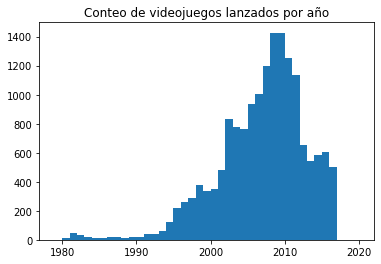

In [14]:
plt.title("Conteo de videojuegos lanzados por año")
plt.hist(x=games['year_of_release'],bins=41,range=[1979,2020])
plt.show()

Se observa que el año en el que más videojuegos se lanzaron fue en el 2009, a partir del cual fueron descendiendo los lanzamientos.

### Ventas totales por plataforma

Elaboramos una tabla de las ventas totales recaudadas por cada plataforma.

In [15]:
pd.pivot_table(games,values='total_sales',index=['platform'],aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False)


,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Elaboramos un gráfico que nos muestra los años de lanzamientos de las plataformas para determinar su vigencia.

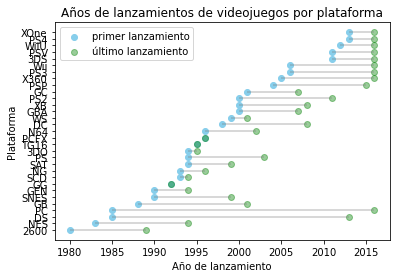

In [16]:
value1=games.groupby(by=['platform'])['year_of_release'].min()
value2=games.groupby(by=['platform'])['year_of_release'].max()
df = pd.DataFrame({'value1':value1 , 'value2':value2 })

# Reordenamos los valores en función del primer año de lanzamiento
ordered_df = df.sort_values(by='value1')
my_range=ordered_df.index
 
plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='primer lanzamiento')
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='último lanzamiento')
plt.legend()

plt.title("Años de lanzamientos de videojuegos por plataforma")
plt.xlabel('Año de lanzamiento')
plt.ylabel('Plataforma')

plt.show()
plt.rcParams["figure.figsize"] = (10,7)

Las plataformas que más dinero recaudó en ventas de videojuegos a nivel global fueron PS2, X360, PS3 y Wii. Sin embargo, las plataformas que para el año 2016 se encontraban en vigencia fueron primordialmente PS3, 3DS, PC, además de las plataformas que estaban emergiendo (PS4, Xbox One y WiiU).

### Análisis de ventas en el año 2016

Debido a que se intenta pronosticar las ventas para el año 2017, el análisis de ventas se realizará en función de los datos del año 2016.

In [17]:
df=games.loc[games['year_of_release']>=2013]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [18]:
pd.pivot_table(df,values='total_sales',index=['platform'],aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False)

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


Escogemos las 5 primeras plataformas que generaron más ventas (PS4, PS3, XOne, 3DS y X360)

Diagrama de caja para las ventas globales de todos los juegos por plataforma.

Text(0.5, 1.0, 'Diagrama de cajas de las ventas por plataformas')

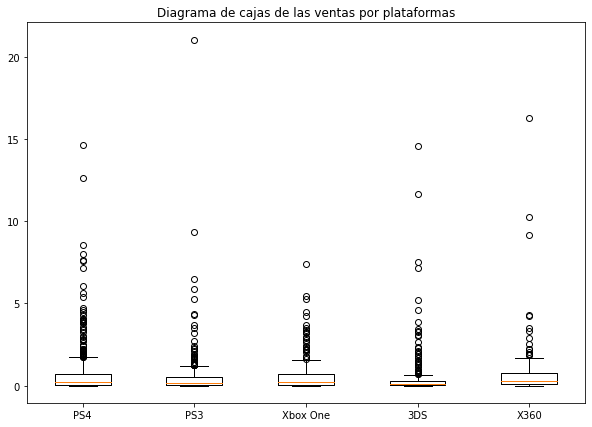

In [19]:
PS4=df.loc[df['platform']=='PS4']['total_sales']
PS3=df.loc[df['platform']=='PS3']['total_sales']
XOne=df.loc[df['platform']=='XOne']['total_sales']
DS3=df.loc[df['platform']=='3DS']['total_sales']
X360=df.loc[df['platform']=='X360']['total_sales']

sales=[PS4,PS3,XOne,DS3,X360]
plt.boxplot(sales)
plt.xticks([1, 2, 3,4,5], ['PS4','PS3' ,'Xbox One', '3DS','X360'])
plt.title("Diagrama de cajas de las ventas por plataformas")

Se observa que ,de las plataformas con ventas más altas, todas tienen una mediana de venta similar; sin embargo, PS4 posee una mayor variación de ventas hacia arriba, seguido de PS3 y Xbox One, que comparando con las cifras de la tabla anterior, se comprueba que poseen una mayor cantidad de ventas que DS3, que tiene una variación amplia hacia arriba pero un rango intercuartil pequeño, y X360, que tiene un rango amplio de ventas pero no en la cantidad que las anteriores plataformas.

Realizamos un análisis de las ventas en correlación con las reseñas de los usuarios y profesionales.

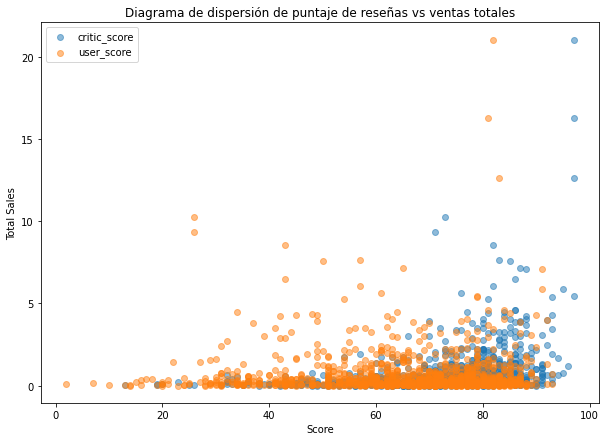

In [20]:
plt.scatter(df['critic_score'],df['total_sales'],alpha=0.5)
plt.scatter(df['user_score'],df['total_sales'],alpha=0.5)
plt.xlabel('Score') 
plt.ylabel('Total Sales')
plt.legend(['critic_score' , 'user_score'],loc = "upper left")
plt.title("Diagrama de dispersión de puntaje de reseñas vs ventas totales")
plt.show()

In [21]:
df[['critic_score','user_score','total_sales']].corr(method='pearson')

,critic_score,user_score,total_sales
critic_score,1.000000,0.502221,0.313700
user_score,0.502221,1.000000,-0.002608
total_sales,0.313700,-0.002608,1.000000


Del gráfico se observa que existe una leve correlación positiva entre las ventas totales y los puntajes de las reseñas dados por los profesionales. El valor de correlación entre la reseña de los usuarios y las ventas totales nos indica que no existe una correlación entre estas variables. 

Analizando los mismos videojuegos en diferentes plataformas.

In [22]:
duplicates=df.loc[df['name'].duplicated(keep=False)].sort_values(by='name',ascending=False)
duplicates=duplicates.loc[(duplicates['platform']=='PS4')|(duplicates['platform']=='PS3')|(duplicates['platform']=='XOne' )|(duplicates['platform']=='3DS')|(duplicates['platform']=='X360')]
pd.pivot_table(duplicates,values='total_sales',index=['name'],aggfunc='sum',columns='platform').reset_index() #.sort_values(by='total_sales',ascending=False)

platform,name,3DS,PS3,PS4,X360,XOne
0,Frozen: Olaf's Quest,0.59,NaN,NaN,NaN,NaN
1,2014 FIFA World Cup Brazil,NaN,0.61,NaN,0.43,NaN
2,3rd Super Robot Wars Z Jigoku Hen,NaN,0.23,NaN,NaN,NaN
3,3rd Super Robot Wars Z: Tengoku-Hen,NaN,0.15,NaN,NaN,NaN
4,7 Days to Die,NaN,NaN,0.14,NaN,0.05
...,...,...,...,...,...,...
460,Zero Escape: Zero Time Dilemma,0.08,NaN,NaN,NaN,NaN
461,ZombiU,NaN,NaN,0.06,NaN,0.01
462,Zombie Army Trilogy,NaN,NaN,0.20,NaN,0.11
463,Zoo Tycoon (2013),NaN,NaN,NaN,0.09,0.36


<AxesSubplot:xlabel='platform', ylabel='name'>

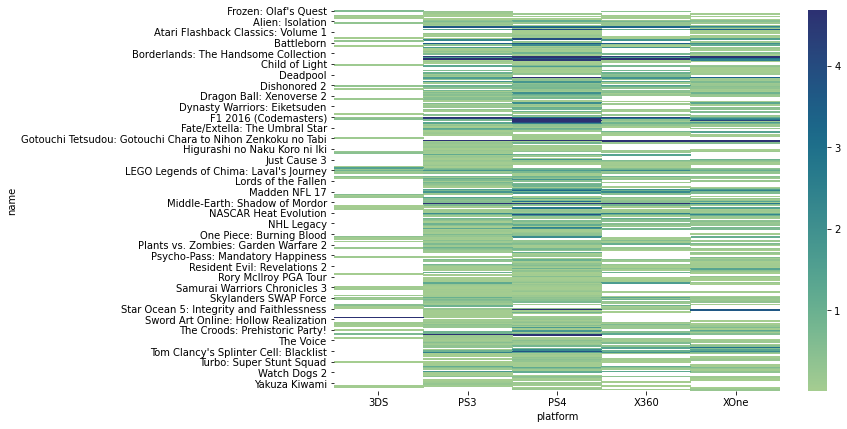

In [23]:
sns.heatmap(duplicates.pivot("name", "platform", "total_sales"), robust=True,cmap="crest", linewidth=0)

La plataforma que más ventas realizó de un mismo juego comparado con otras plataformas fue PS4, salvo algunas excepciones en las que XOne realizó más ventas.

In [24]:
pd.pivot_table(df,values='total_sales',index='genre',aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False)

,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


Los géneros más vendidos a nivel global durante a partir del año 2013 fueron action, shooter, sports y role-playing los cuales lideraron las ventas por muchas diferencia con el resto de géneros.

### Análisis por regiones

Para el análisis solo tomaremos los datos posteriores al año 2012.

Analizamos las plataformas que más recaudaron por regiones.

In [25]:
na=df[['name','platform','genre','na_sales','rating']]
eu=df[['name','platform','genre','eu_sales','rating']]
jp=df[['name','platform','genre','jp_sales','rating']]

In [26]:
platform_na=pd.pivot_table(na,values='na_sales',index='platform',aggfunc='sum').reset_index().sort_values(by='na_sales',ascending=False).head(5)
platform_na

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


In [27]:
platform_eu=pd.pivot_table(eu,values='eu_sales',index='platform',aggfunc='sum').reset_index().sort_values(by='eu_sales',ascending=False).head(5)
platform_eu

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


In [28]:
platform_jp=pd.pivot_table(jp,values='jp_sales',index='platform',aggfunc='sum').reset_index().sort_values(by='jp_sales',ascending=False).head(5)
platform_jp

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


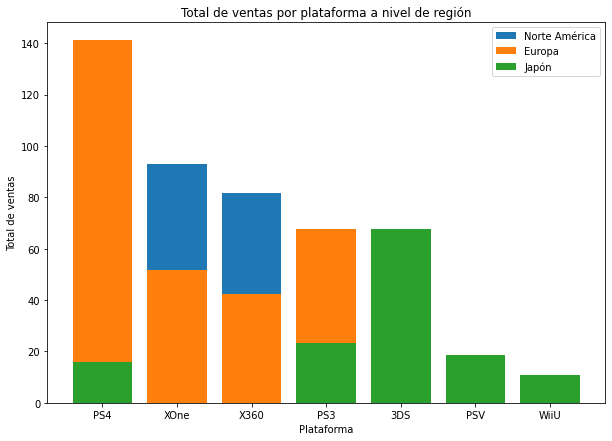

In [29]:
plt.bar(platform_na['platform'], platform_na['na_sales'], label='Norte América')
plt.bar(platform_eu['platform'], platform_eu['eu_sales'], label='Europa')
plt.bar(platform_jp['platform'], platform_jp['jp_sales'], label='Japón')
plt.legend(loc='best')
plt.title("Total de ventas por plataforma a nivel de región")
plt.xlabel('Plataforma')
plt.ylabel('Total de ventas')
plt.show()

Las plataformas más usadas en Norte América son PS4 y Xbox One; en Europa se repiten las plataformas añadiendo PS3. Además, el número de ventas es mayor en PS4 y menor en Xbox One. A diferencia de las dos regiones anteriores, en Japón las plataformas más usadas son 3DS, PS3 y PSV con un número de ventas bajo en comparación con las regiones anteriores.

Analizamos los géneros más jugados por regiones.

In [30]:
genre_na=pd.pivot_table(na,values='na_sales',index='genre',aggfunc='sum').reset_index().sort_values(by='na_sales',ascending=False).head(5)
genre_na

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


In [31]:
genre_eu=pd.pivot_table(eu,values='eu_sales',index='genre',aggfunc='sum').reset_index().sort_values(by='eu_sales',ascending=False).head(5)
genre_eu

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


In [32]:
genre_jp=pd.pivot_table(jp,values='jp_sales',index='genre',aggfunc='sum').reset_index().sort_values(by='jp_sales',ascending=False).head(5)
genre_jp

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


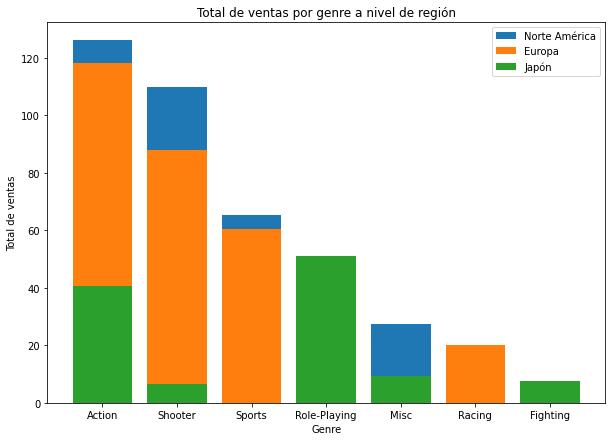

In [33]:
plt.bar(genre_na['genre'], genre_na['na_sales'], label='Norte América')
plt.bar(genre_eu['genre'], genre_eu['eu_sales'], label='Europa')
plt.bar(genre_jp['genre'], genre_jp['jp_sales'], label='Japón')
plt.legend(loc='best')
plt.title("Total de ventas por genre a nivel de región")
plt.xlabel('Genre')
plt.ylabel('Total de ventas')
plt.show()

Las regiones de Norte América y Europa tienen distribuciones similares en cuando a los géneros más vendidos en donde figuran action, shooter y sports como los géneros más vendidos. En Japón, los géneros que lideran las ventas son role-playing, action y misc.

Analizamos la clasificación ESRB por regiones.

In [34]:
rating_na=pd.pivot_table(na,values='na_sales',index='rating',aggfunc='sum').reset_index().sort_values(by='na_sales',ascending=False)
rating_na

,rating,na_sales
2,M,165.21
0,E,79.05
1,E10+,54.24
3,T,49.79


In [35]:
rating_eu=pd.pivot_table(eu,values='eu_sales',index='rating',aggfunc='sum').reset_index().sort_values(by='eu_sales',ascending=False)
rating_eu

,rating,eu_sales
2,M,145.32
0,E,83.36
1,E10+,42.69
3,T,41.95


In [36]:
rating_jp=pd.pivot_table(jp,values='jp_sales',index='rating',aggfunc='sum').reset_index().sort_values(by='jp_sales',ascending=False)
rating_jp

,rating,jp_sales
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


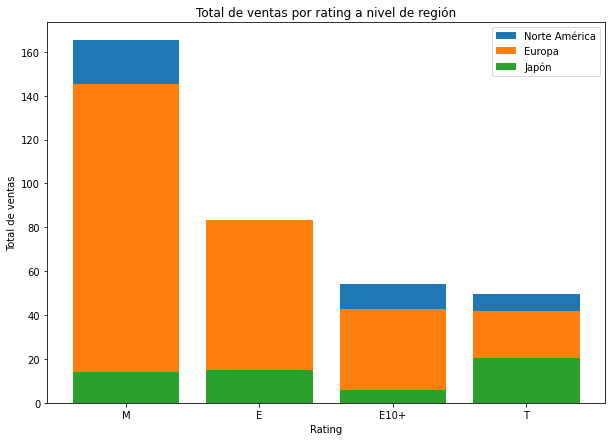

In [37]:
plt.bar(rating_na['rating'], rating_na['na_sales'], label='Norte América')
plt.bar(rating_eu['rating'], rating_eu['eu_sales'], label='Europa')
plt.bar(rating_jp['rating'], rating_jp['jp_sales'], label='Japón')
plt.legend(loc='best')
plt.title("Total de ventas por rating a nivel de región")
plt.xlabel('Rating')
plt.ylabel('Total de ventas')
plt.show()

En las regiones de Norte América y Europa lidera la clasificación M y tienen un orden de clasificación igual. En Japón lidera la clasificación T en una cantidad de ventas menor que las clasificaciones más bajas en las otras regiones.

Analizamos los juegos más populares por regiones.

In [38]:
name_na=pd.pivot_table(na,values='na_sales',index='name',aggfunc='sum').reset_index().sort_values(by='na_sales',ascending=False).head(5)
name_na

,name,na_sales
430,Grand Theft Auto V,23.84
140,Call of Duty: Ghosts,14.94
139,Call of Duty: Black Ops 3,12.25
665,Minecraft,11.28
138,Call of Duty: Advanced Warfare,10.51


In [39]:
name_eu=pd.pivot_table(eu,values='eu_sales',index='name',aggfunc='sum').reset_index().sort_values(by='eu_sales',ascending=False).head(5)
name_eu

,name,eu_sales
430,Grand Theft Auto V,23.42
334,FIFA 15,12.02
335,FIFA 16,11.09
333,FIFA 14,10.96
139,Call of Duty: Black Ops 3,9.49


In [40]:
name_jp=pd.pivot_table(jp,values='jp_sales',index='name',aggfunc='sum').reset_index().sort_values(by='jp_sales',ascending=False).head(5)
name_jp

,name,jp_sales
799,Pokemon X/Pokemon Y,4.35
675,Monster Hunter 4,3.44
1019,Super Smash Bros. for Wii U and 3DS,3.24
1238,Yokai Watch 2 Ganso/Honke,3.18
795,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3.10


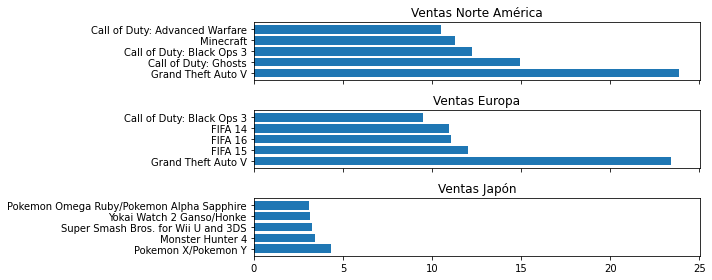

In [41]:
fig, ax = plt.subplots(3, 1,  sharex=True, figsize=(10, 4))
ax[0].barh(name_na['name'], name_na['na_sales'], label='Norte América')
ax[1].barh(name_eu['name'], name_eu['eu_sales'], label='Europa')
ax[2].barh(name_jp['name'], name_jp['jp_sales'], label='Japón')
ax[0].set_title('Ventas Norte América')
ax[1].set_title('Ventas Europa')
ax[2].set_title('Ventas Japón')
fig.tight_layout()
plt.show()

En Norte América y en Europa, el juego más popular fue Grand Theft Auto V y las listas se mantienen similar, mientras que en Japón los juegos más populares son diferentes a los de las regiones anteriores.

### Conclusiones

- Las plataformas que para el año 2016 se encontraban en vigencia fueron primordialmente PS4, Xbox One y WiiU.
- Existe una leve correlación positiva entre las ventas totales y los puntajes de las reseñas dados por los profesionales.
- Las regiones de Norte América y Europa tienen distribuciones similares en cuando a los géneros más vendidos en donde figuran Shooter, Sports y Action como los géneros más vendidos. En Japón, los géneros que lideran las ventas son action, role-playing y misc.
- La región de Norte América y Europa lidera la clasificación M, mientras que en Japón lidera la clasificación T.
- En Norte América y en Europa, el juego más popular fue Grand Theft Auto V y las listas se mantienen similar, mientras que en Japón los juegos más populares son diferentes a los de las regiones anteriores.

## Pruebas de hipótesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Debido a que queremos verificar si las calificaciones promedio de los usuarios para las dos poblaciones independientes son iguales, establecimos como hipótesis nula que 'las medias de las dos poblaciones son iguales', por lo que la hipótesis alternativa sería 'las medias de las dos poblaciones no son iguales'.

Establecemos el nivel crítico de significación estadística: alpha=0.05.

In [42]:
arrayXOne=games.loc[games['platform']=='XOne']['user_score']
arrayPC=games.loc[games['platform']=='PC']['user_score']

arrayXOne=arrayXOne[~arrayXOne.isna()]
arrayPC=arrayPC[~arrayPC.isna()]

Aplicamos la prueba de Levene para determinar el valor de equal_var.

In [43]:
stat, p = levene(arrayXOne, arrayPC)
p

0.2795532372785057

Como el p-value es menor a 0.05 el valor de equal_var será True.

In [44]:
alpha = 0.05

results =st.ttest_ind(arrayXOne,arrayPC,equal_var=True)
print('p-value:',results.pvalue)

if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.3037979620147524e-05
Rechazamos la hipótesis nula


In [45]:
arrayXOne.mean(),arrayPC.mean()

(65.21428571428571, 70.65960264900663)

El valor p nos dice que aunque las cantidades promedio para los dos planes son diferentes, existe una muy baja probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es claramente demasiado baja por lo que podemos concluir que las medias de las dos poblaciones no son iguales (hipótesis alternativa). Concluímos que las medias de las calificaciones de los usuarios para las plataformas Xbox One y PC no son las mismas.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Debido a que queremos verificar si las calificaciones promedio de los usuarios para las dos poblaciones independientes son diferentes, establecimos como hipótesis nula que 'las medias de las dos poblaciones son iguales', por lo que la hipótesis alternativa sería 'las medias de las dos poblaciones no son iguales'.

Establecemos el nivel crítico de significación estadística: alpha=0.05.

In [46]:
arrayAction=games.loc[games['genre']=='Action']['user_score']
arraySports=games.loc[games['genre']=='Sports']['user_score']

arrayAction=arrayAction[~arrayAction.isna()]
arraySports=arraySports[~arraySports.isna()]

Aplicamos la prueba de Levene para determinar el valor de equal_var.

In [47]:
stat, p = levene(arrayAction, arraySports)
p

8.763985507235711e-05

Como el p-value es menor a 0.05 el valor de equal_var será False.

In [48]:
alpha = 0.05


results =st.ttest_ind(arrayAction,arraySports,equal_var=False)
print('p-value:',results.pvalue)

if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.07370217419278914
No rechazamos la hipótesis nula


In [49]:
arrayAction.mean(),arraySports.mean()

(70.58129175946547, 69.51433857539315)

El valor p nos dice que aunque las cantidades promedio para los dos planes son diferentes, existe una probabilidad de 7% de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es suficiente para no rechazar la hipótesis nula y poder concluir que las medias de las dos poblaciones son iguales (hipótesis nula). Concluímos que las medias de las calificaciones de los usuarios para los géneros de acción y deportes son iguales.

## Conclusiones

- Las plataformas que más dinero recaudó en ventas de videojuegos a nivel global fueron PS2, X360, PS3 y Wii. Sin embargo, las plataformas que para el año 2016 se encontraban emergiendo fueron PS4, 3DS, Xbox One y WiiU.
- Existe una leve correlación positiva entre las ventas totales y los puntajes de las reseñas dados por los profesionales.
- Los géneros más vendidos a nivel global a partir del año 2013 fueron disparos, acción, deportes y juegos de roles, los cuales lideraron las ventas por mucha diferencia con el resto de géneros.
- Las regiones de Norte América y Europa tienen ventas similares en cuanto a plataformas, géneros, rating y juegos; sin embargo, son muy distintos en comparación con Japón.
- Las medias de las calificaciones de los usuarios para las plataformas Xbox One y PC no son las mismas.
- Las medias de las calificaciones de los usuarios para los géneros de acción y deportes son iguales.